In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [38]:
# MSFT stock data
msft_data = yf.download('MSFT', start='2010-01-01', end='2024-01-01')
msft_data = msft_data['Close']  # Use closing prices


[*********************100%%**********************]  1 of 1 completed


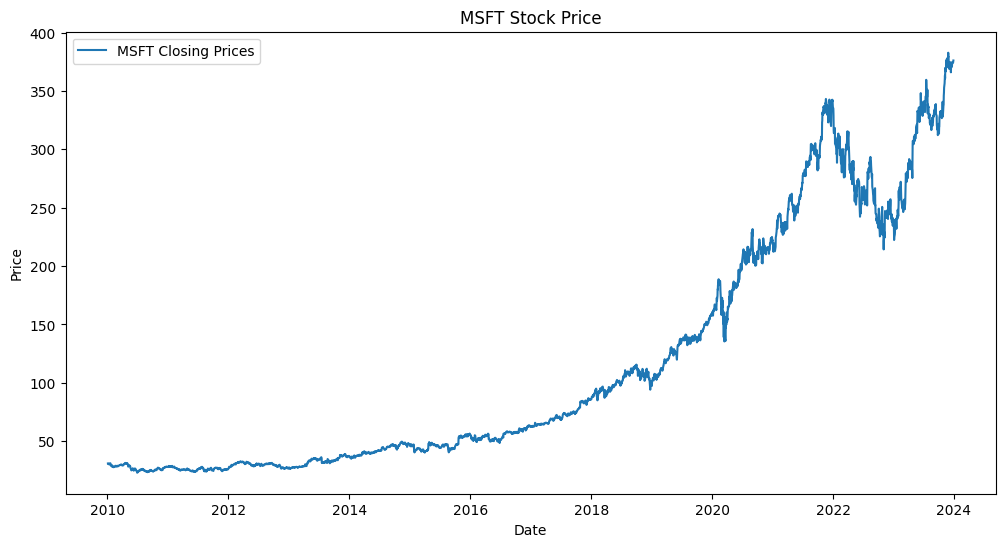

In [39]:
# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(msft_data, label='MSFT Closing Prices')
plt.title('MSFT Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [40]:
from statsmodels.tsa.stattools import adfuller
# Check stationary
result = adfuller(msft_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 1.7188759855052136
p-value: 0.998173786671935


In [41]:
msft_diff = msft_data.diff().dropna()

# Difference data and checking stationary again: if p value < 0.05
result = adfuller(msft_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -12.881435780767506
p-value: 4.649786862734926e-24


<Figure size 1200x600 with 0 Axes>

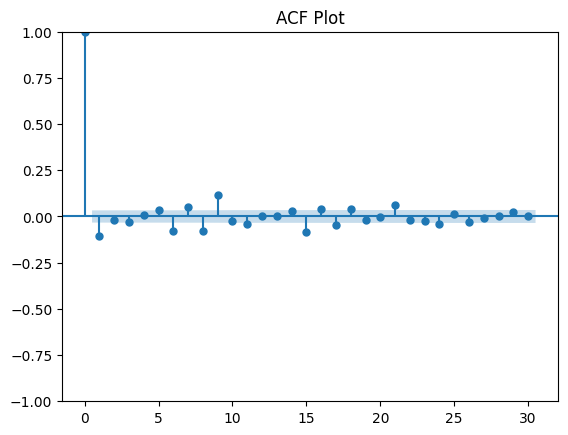

<Figure size 1200x600 with 0 Axes>

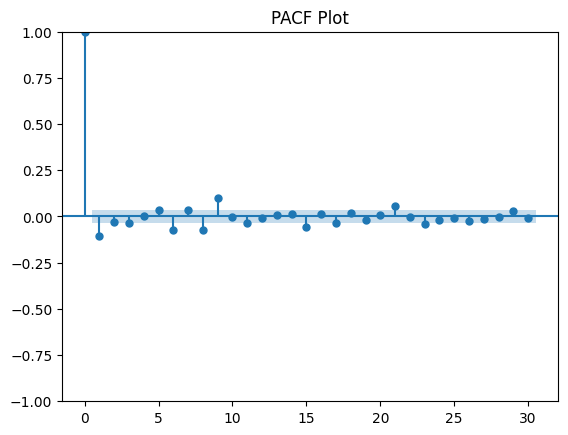

In [42]:
plt.figure(figsize=(12, 6))
plot_acf(msft_diff, lags=30)
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(msft_diff, lags=30)
plt.title('PACF Plot')
plt.show()


In [43]:
from statsmodels.tsa.stattools import acf, pacf

# Assuming msft_diff is your differenced data
lags = 30  # Number of lags

acf_values = acf(msft_diff, nlags=lags)
pacf_values = pacf(msft_diff, nlags=lags)


In [44]:
def find_significant_terms(acf_values, pacf_values, alpha=0.05):
    # Calculate the number of lags
    n_lags = len(acf_values)
    
    # Standard error for ACF and PACF
    se = 1 / np.sqrt(len(msft_diff))

    # Count significant terms
    significant_acf = sum(abs(acf_values) > se)
    significant_pacf = sum(abs(pacf_values) > se)

    return significant_acf, significant_pacf

# Find significant terms
significant_acf, significant_pacf = find_significant_terms(acf_values, pacf_values)
print(f"Number of significant ACF terms (q): {significant_acf}, Number of significant PACF terms (p): {significant_pacf}")


Number of significant ACF terms (q): 23, Number of significant PACF terms (p): 18


In [45]:
model = ARIMA(msft_data, order=(18, 1, 23))
model_fit = model.fit()
print(model_fit.summary())


/opt/anaconda3/envs/py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/py3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum 

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3522
Model:               ARIMA(18, 1, 23)   Log Likelihood               -8395.966
Date:                Sun, 14 Jul 2024   AIC                          16875.932
Time:                        15:51:09   BIC                          17134.925
Sample:                             0   HQIC                         16968.335
                               - 3522                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0385      0.148     -0.260      0.795      -0.329       0.252
ar.L2         -0.2625      0.127     -2.059      0.039      -0.512      -0.013
ar.L3         -0.0957      0.124     -0.771      0.4

3522    375.227599
3523    375.140120
3524    373.564020
3525    373.687829
3526    373.400913
3527    373.324898
3528    374.084220
3529    374.221309
3530    375.743724
3531    374.894075
Name: predicted_mean, dtype: float64


/opt/anaconda3/envs/py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


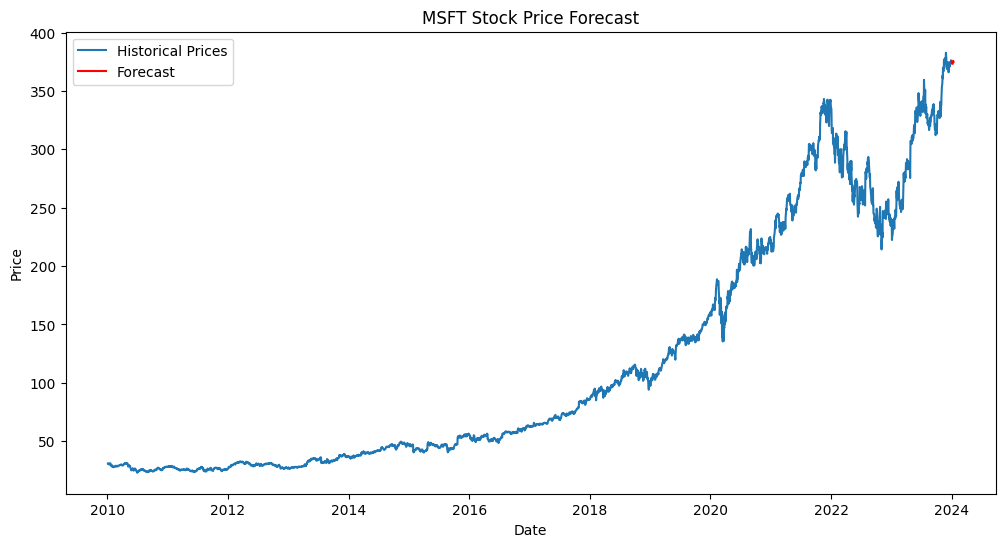

In [46]:
# Forecast the next 10 days
forecast = model_fit.forecast(steps=10)
print(forecast)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(msft_data.index, msft_data, label='Historical Prices')
plt.plot(pd.date_range(msft_data.index[-1], periods=11, freq='B')[1:], forecast, label='Forecast', color='red')
plt.title('MSFT Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [47]:
# Forecast the next 10 days
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)


/opt/anaconda3/envs/py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [48]:
# Get the last date in your original dataset
last_date = msft_data.index[-1]

# Create a date range for the forecasted period
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='B')


/var/folders/rx/hs96grbs55709j6n4983c4nm0000gn/T/ipykernel_17483/4220581591.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = msft_data.last('20D')  # Get the last 20 days of historical data


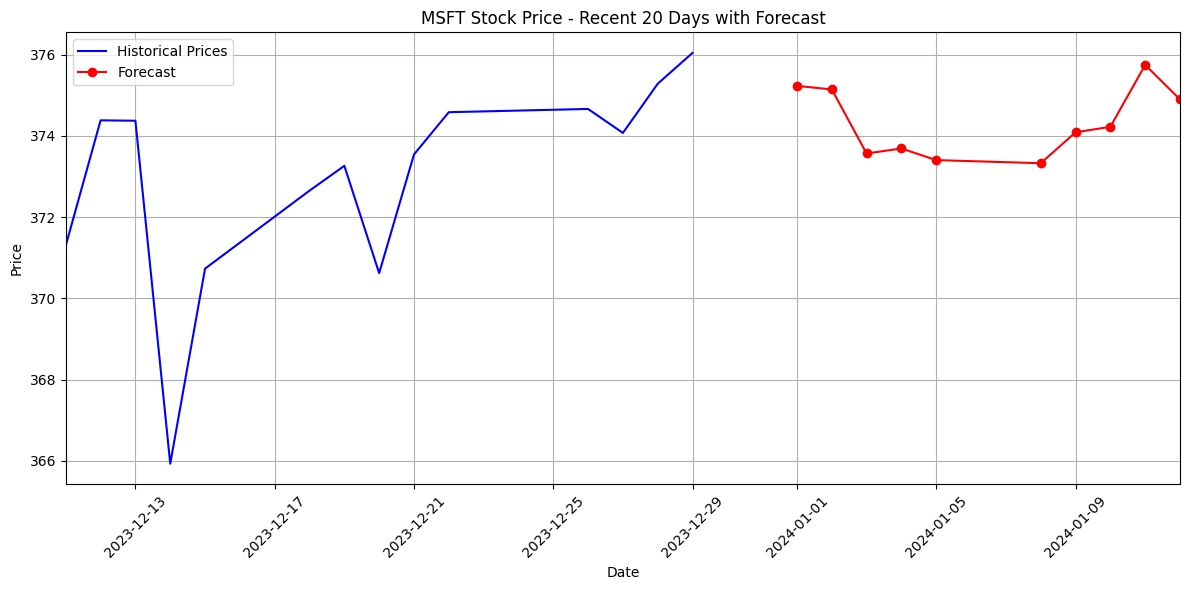

In [49]:
# Combine historical and forecasted data for plotting
recent_data = msft_data.last('20D')  # Get the last 20 days of historical data

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(recent_data.index, recent_data, label='Historical Prices', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red', marker='o')

# Set x-axis limits to zoom in on the most recent 20 days
plt.xlim(recent_data.index[0], forecast_dates[-1])

# Formatting the plot
plt.title('MSFT Stock Price - Recent 20 Days with Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
